<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB
None
Axes(0.125

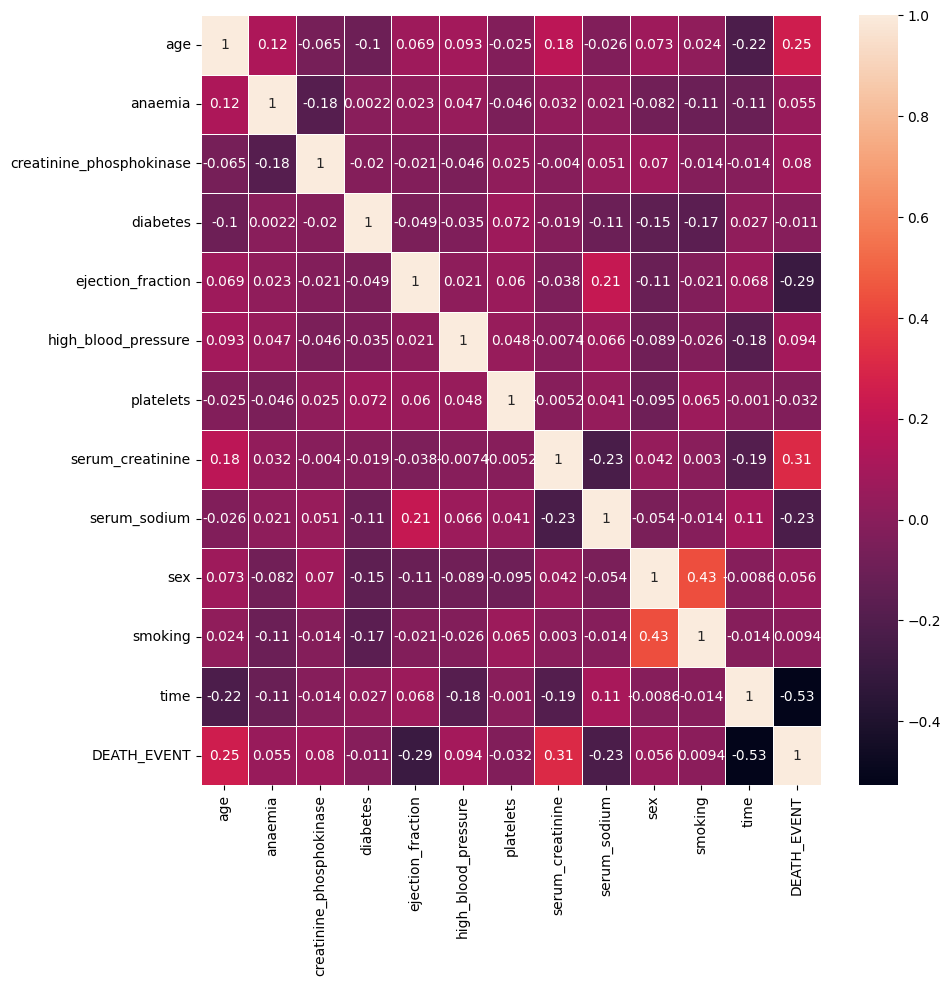

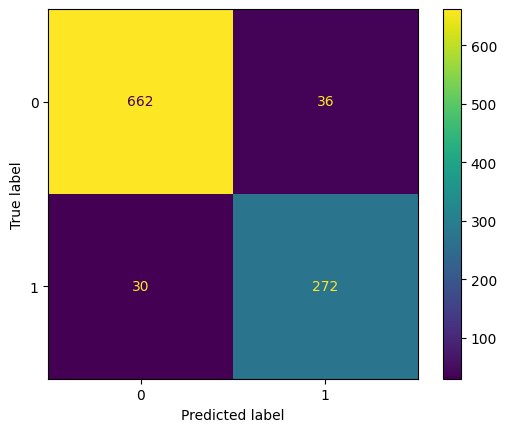

К ближайших соседей: 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       698
           1       0.88      0.90      0.89       302

    accuracy                           0.93      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.93      0.93      0.93      1000



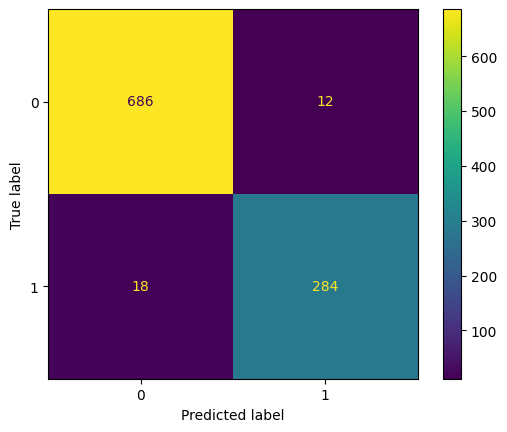

Градиентный бустинг: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       698
           1       0.96      0.94      0.95       302

    accuracy                           0.97      1000
   macro avg       0.97      0.96      0.96      1000
weighted avg       0.97      0.97      0.97      1000



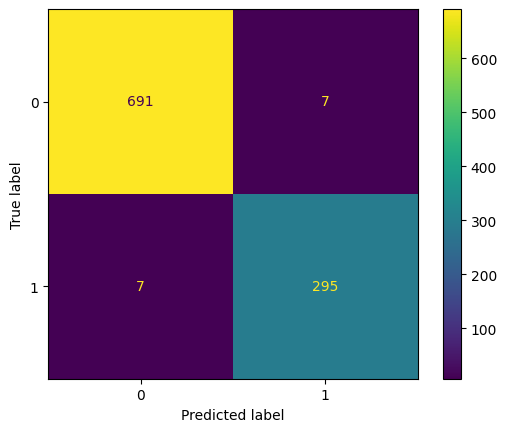

Деревья решений: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       698
           1       0.98      0.98      0.98       302

    accuracy                           0.99      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.99      0.99      0.99      1000



D:\Belhard\0\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


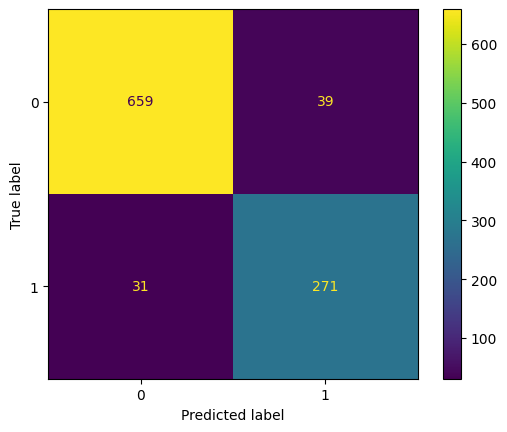

ADA: 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       698
           1       0.87      0.90      0.89       302

    accuracy                           0.93      1000
   macro avg       0.91      0.92      0.92      1000
weighted avg       0.93      0.93      0.93      1000



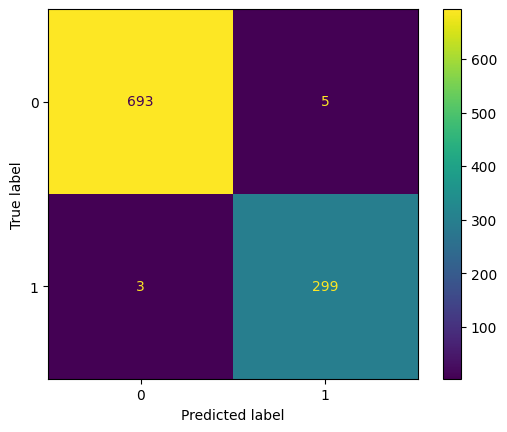

Случайный лес: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       698
           1       0.98      0.99      0.99       302

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

Выбросы:  (array([  60,  273,  882,  938, 1002, 1064, 1101, 1203, 1216, 1496, 1621,
       1712, 1735, 2117, 2211, 2498, 2939, 2966, 3500, 3530, 3875, 3878,
       3948, 4153, 4376, 4684], dtype=int64),)


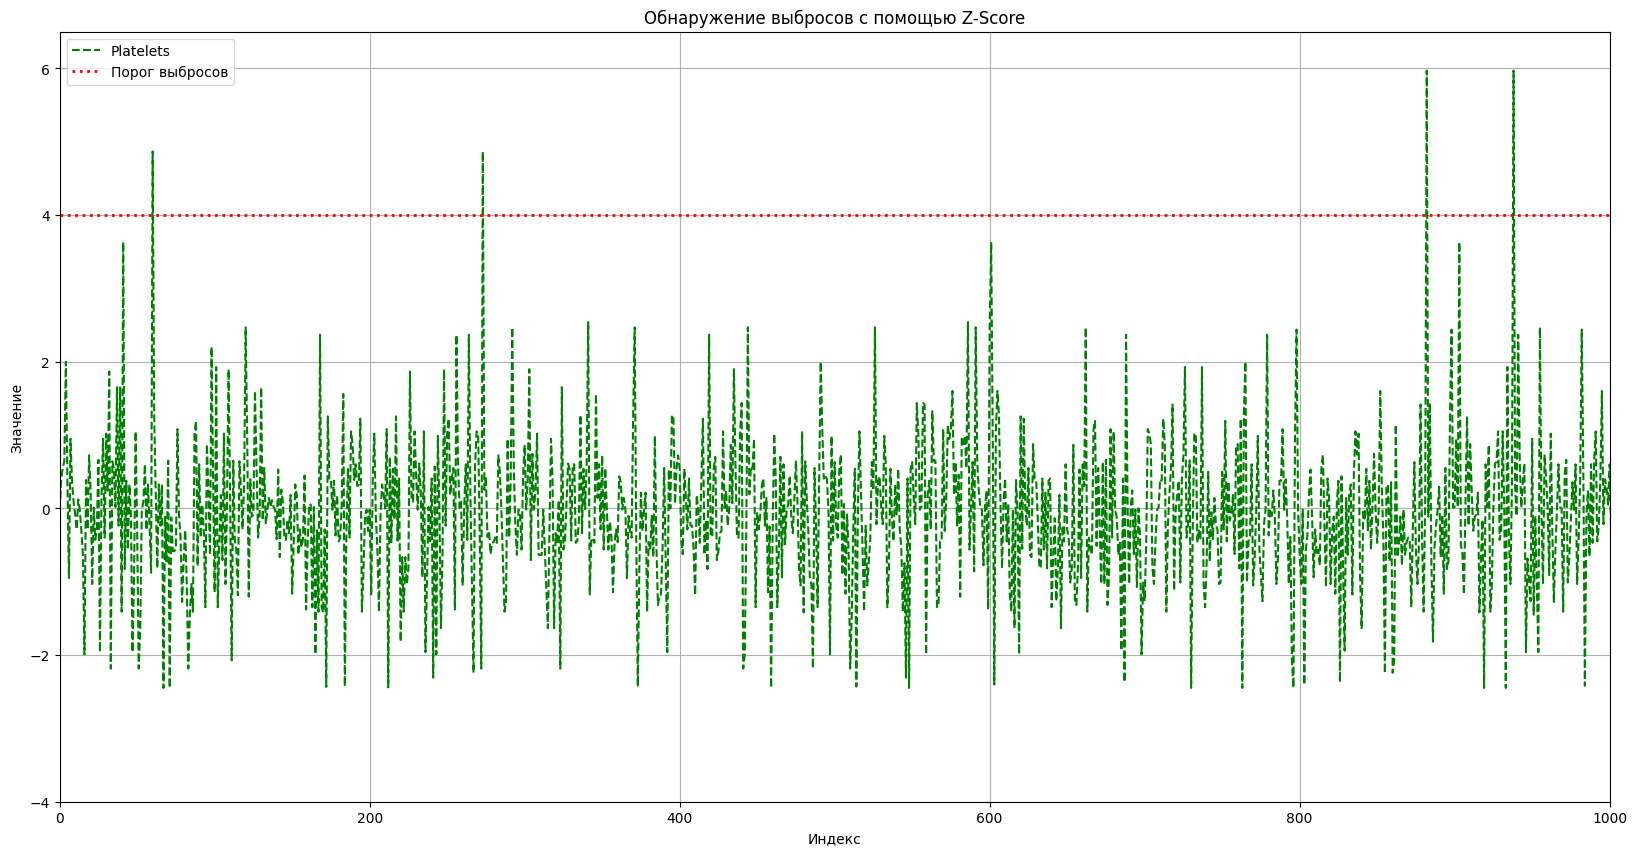

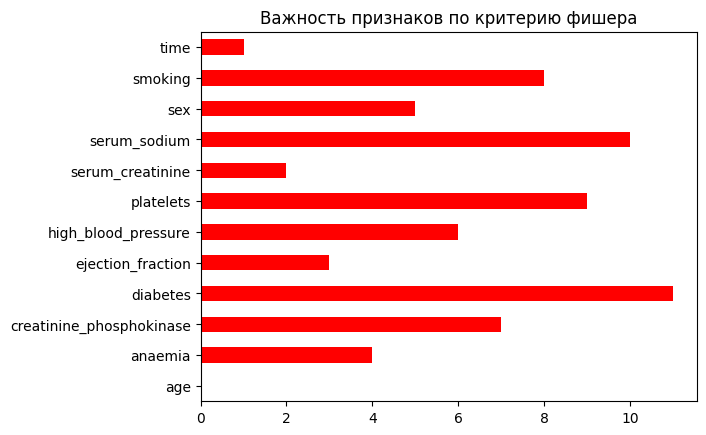

None


In [101]:
# 1 - пациент умер во время наблюдений, 0 - нет 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from skfeature.function.similarity_based import fisher_score

heart_det = pd.read_excel('heart_failure_clinical_records.xls')
print(heart_det.info())
# Создаём функцию для определния корреляции признаков и визуализации её в виде тепловой карты
def correlation_map (data_fr):
    correlation = data_fr.corr()
    plt.figure(figsize= (10, 10))
    heat_map = sns.heatmap(correlation, annot = True, linewidth=.5)
    return heat_map
print(correlation_map(heart_det))

# Извлекаем матрицу признаков и матрицу целевого признака
x = heart_det.drop(columns = ['DEATH_EVENT'])
y = heart_det['DEATH_EVENT']
# print(x.shape\n, y.shape)

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.80, random_state=42)

balance = heart_det['DEATH_EVENT'].value_counts()
print ('\nБаланс классов: ', balance)

# Классификатор К ближайших соседей
def KNeighbors (X_train, X_test, y_train, y_test):
    KN_cl = KNeighborsClassifier(n_neighbors=5)
    KN_cl.fit(X_train, y_train)
    KN_pred = KN_cl.predict(X_test)
    report = classification_report(y_test, KN_pred)
    cm = confusion_matrix(y_test, KN_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    return report
print ("К ближайших соседей: \n", KNeighbors(X_train, X_test, y_train, y_test))

# Классификатор градиентного бустинга
def GradientBoosting (X_train, X_test, y_train, y_test):
    gb_cl = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
    gb_cl.fit(X_train, y_train)
    gb_pred = gb_cl.predict(X_test)
    report = classification_report(y_test, gb_pred)
    cm = confusion_matrix(y_test, gb_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    return report
print ("Градиентный бустинг: \n", GradientBoosting(X_train, X_test, y_train, y_test))

# Классификатор Деревья решений
def DecisionTree (X_train, X_test, y_train, y_test):
    DT_cl = DecisionTreeClassifier()
    DT_cl.fit(X_train, y_train)
    DT_pred = DT_cl.predict(X_test)
    report = classification_report(y_test, DT_pred)
    cm = confusion_matrix(y_test, DT_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    return report
print ("Деревья решений: \n", DecisionTree(X_train, X_test, y_train, y_test))

# AdaBoostClassifier
def ADA (X_train, X_test, y_train, y_test):
    ada_cl = AdaBoostClassifier()
    ada_cl.fit(X_train, y_train)
    ADA_pred = ada_cl.predict(X_test)
    report = classification_report(y_test, ADA_pred)
    cm = confusion_matrix(y_test, ADA_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    return report
print ("ADA: \n", ADA(X_train, X_test, y_train, y_test))

# RandomForest 
def RandFor (X_train, X_test, y_train, y_test):
    RF_cl = RandomForestClassifier()
    RF_cl.fit(X_train, y_train)
    RF_pred = RF_cl.predict(X_test)
    report = classification_report(y_test, RF_pred)
    cm = confusion_matrix(y_test, RF_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    return report
print ("Случайный лес: \n", RandFor(X_train, X_test, y_train, y_test))

# Находим выбросы
# Функция для нахождения Z-score
def z_skores(col):
    mean = np.mean(col)
    std = np.std(col)
    z_skore = [(x - mean)/std for x in col]
    return z_skore
    
heart_det = pd.read_excel('heart_failure_clinical_records.xls')

# Выбираем один из столбцов для построения графика Z-score
a = heart_det['platelets']

fig = plt.figure(figsize=(20, 10))
xy = plt.axes()
plt.plot(z_skores(a), 'g--', label='Platelets')
plt.grid()
xy.set(xlim=(0, 1000), ylim=(-4, 6.5))
plt.axhline(4, color='r', linestyle='dotted', linewidth=2, label='Порог выбросов')
outliers = np.where(np.abs(z_skores(a)) > 4)
print('Выбросы: ', outliers)
plt.title('Обнаружение выбросов с помощью Z-Score')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.show()


def fisher(X_train, y_train):
    # Преобразовываем матрицу в массив numpy
    X_train_fis = np.asarray(X_train)
    y_train_fis = np.asarray(y_train) 
    # Вычисляем критерий Фишера
    ranks = fisher_score.fisher_score(X_train_fis, y_train_fis)

    # Делаем график важности признаков
    feature_importances = pd.Series(ranks, heart_det.columns[0:len(heart_det.columns)-1])
    feature_importances.plot(kind='barh', color='red')
    plt.title('Важность признаков по критерию фишера')
    plt.show()
    return plt.show()

print(fisher(X_train, y_train))

In [ ]:
# Определяем и визуализируем важность признаков по критерию Фишера
#import pandas as pd
#import numpy as np
#from skfeature.function.similarity_based import fisher_score
#import matplotlib.pyplot as plt
#heart_det = pd.read_excel('heart_failure_clinical_records.xls')

# Извлекаем матрицу признаков и матрицу целевого признака
#x = heart_det.drop(columns = ['DEATH_EVENT'])
#y = heart_det['DEATH_EVENT']
#X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.80, random_state=42)
# Преобразовываем матрицу в массив numpy
#X_train_fis = np.asarray(X_train)
#y_train_fis = np.asarray(y_train) 
# Вычисляем критерий Фишера
#ranks = fisher_score.fisher_score(X_train_fis, y_train_fis)

# Делаем график важности признаков
#feature_importances = pd.Series(ranks, heart_det.columns[0:len(heart_det.columns)-1])
#feature_importances.plot(kind='barh', color='red')
#plt.title('Важность признаков по критерию фишера')
#plt.show()